# Project: Investigate a Movie DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

***

<a id='intro'></a>
# Introduction

We will be exploring Hollywood movies through the dataset provided! Here are the steps I will be taking:

Step 1: What kind of questions are we going to ask. What do we want to figure out with this data? I will try and explore some 10,000 movie titles in order to discover valuable relationships between variables.

- What properties are associated with specific years and decades?
    - Over time, what genres are most popular?
    - Over time, has movie length (runtime) increased or decreased?
- What properties are associated with higher revenues?
    - Are specific genres associated with higher revenues?
    - Are movies with higher revenues more popular?
    - Does a larger budget correlate to higher revenues?
    - Do movies with higher revenues make more profits?

I will try to analyse the above questions and in the process hopefully stumble across new insights as well.

Step 2: Data Wrangling. Gather, load, and assess the data. Make modifications, such as adding and replacing information and removing duplicates and extraneous data, to ensure my dataset is clean for analysis.

Step 3: Data Exploration. Augment the data, remove outliers, create better features, and find patterns.

Step 4: Conclusions. I will try and summarize my findings and the relationships, make predictions, and present the findings visually.

***

In [1]:
# importing libraries that we will use for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this step, we will gather and our data, a csv spreadsheet provided by Udacity, then load it into a dataframe to assess its quality. We will be looking for missing or errant, and problems in quality and/or structure. We will be removing extraneous data and making modifications, such as replacing information and removing duplicates, to ensure our dataset is trim and clean for analysis.

### General Properties

In [2]:
# Gather data: loading data into a dataframe and printing out a few lines. Further, inspecting datatypes and looking for missing/errant data.
df = pd.read_csv('movies.csv')
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6262,1947,tt0350261,0.893879,30000000,18618284,An Unfinished Life,Robert Redford|Jennifer Lopez|Morgan Freeman|B...,http://www.miramax.com/anunfinishedlife/,Lasse HallstrÃ¶m,Every secret takes on a life of its own.,...,"Stoic and heartbroken, Einar Gilkyson quietly ...",108,Drama,Miramax Films|Revolution Studios|Persistent En...,9/9/05,82,6.9,2005,3.349690e+07,2.078849e+07
4179,13,tt0109830,6.715966,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,NaN,Robert Zemeckis,"The world will never be the same, once you've ...",...,A man with a low IQ has accomplished great thi...,142,Comedy|Drama|Romance,Paramount Pictures,7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08
3114,13973,tt1024715,0.382852,3000000,3830137,Choke,Anjelica Huston|Kelly Macdonald|Sam Rockwell|C...,NaN,Clark Gregg,From the author of Fight Club,...,A sex-addicted con-man pays for his mother's h...,92,Comedy|Drama,Fox Searchlight Pictures|Contrafilm|ATO Pictur...,9/26/08,54,6.1,2008,3.038360e+06,3.879112e+06
4046,9689,tt0278823,0.444428,16000000,0,Hollywood Ending,Woody Allen|George Hamilton|TÃ©a Leoni|Debra M...,NaN,Woody Allen,It's going to be a shot in the dark!,...,"Woody Allen stars as Val Waxman, a two-time Os...",112,Comedy|Drama,DreamWorks SKG,5/3/02,54,6.2,2002,1.939618e+07,0.000000e+00
9564,24348,tt0095895,0.168545,2500000,589244,Powaqqatsi,NaN,NaN,Godfrey Reggio,NaN,...,An exploration of technologically developing n...,99,Documentary|Drama|Music,NaN,4/29/88,18,7.2,1988,4.609728e+06,1.086502e+06


In [3]:
# Assess number of rows and columns of dataset
df.shape

(10866, 21)

In [4]:
# Assess summary of dataset, including datatypes, and check for missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> There is missing row data for many columns but I will eventually remove these columns further down in my analysis.
Next we will want to see the statistics for the columns

In [5]:
# assess statistics for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Notable findings:
- Popularity ranges from 0 - 33, but has an average of .6 (33 could be an outlier?)
- Votes range from 1.5 to 9.2, with an average of 6 
- Budget (usd) ranges from approx. 0 - 425 million (average 17.6 million) 
- Revenue (usd) ranges from approx. 0 - 2.8 billion (average 51.4 million) 
- Release years range from 1960 - 2015 (average 2001, most were released after 1995)


Next, we'll clean our data.
***

### Data Cleaning
Now I will make modifications in the dataset. 
I want to remove extraneous data and duplicates, then add and replace information to ensure our dataset is clean for analysis.

- I'll drop extraneous columns that aren't relevant to our analysis.
- I am dropping release date since I'm more interested in the release year.
- I'll keep the id here in case I want to merge with another dataset.

In [6]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True) 
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


The unecessary columns were removed. Now we want to assess if there are any duplicates.

In [7]:
sum(df.duplicated())

1

There is only 1 duplicate, so we'll drop that row and perform 2 checks to ensure the duplicates were removed.


In [8]:
df.drop_duplicates(inplace=True)
print(sum(df.duplicated()))
print(df.shape)

0
(10865, 14)


There are no longer any duplicates and the dataset now has one less row. Next, I'll assess if any
rows have missing values.

In [9]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Let's view the rows with missing information to assess if it's ok to drop. I'd like to order by runtime to get a sense if these are full feature length films.

In [10]:
df[df.isnull().any(axis=1)].sort_values(['runtime'], ascending=True)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2370,127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,12,5.8,2010,0.000000e+00,0.000000e+00
2315,48373,0.171615,0,0,Listen to Your Heart,Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...,NaN,0,Drama|Music|Romance,29,7.3,2010,0.000000e+00,0.000000e+00
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,18,5.7,2014,0.000000e+00,0.000000e+00
4883,142563,0.078472,0,0,Fresh Guacamole,NaN,PES,2,Animation,29,7.9,2012,0.000000e+00,0.000000e+00
4890,126909,0.083202,0,0,Cousin Ben Troop Screening,Jason Schwartzman,Wes Anderson,2,NaN,14,7.0,2012,0.000000e+00,0.000000e+00
7905,13924,0.647261,0,0,The Adventures of AndrÃ© and Wally B.,NaN,Alvy Ray Smith,2,Animation,32,5.3,1984,0.000000e+00,0.000000e+00
10754,3171,0.002757,0,0,Bambi Meets Godzilla,NaN,Marv Newland,2,Animation|Comedy,12,5.6,1969,0.000000e+00,0.000000e+00
10550,13925,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,81,7.3,1986,0.000000e+00,0.000000e+00
5934,200204,0.067433,0,0,Prada: Candy,Peter Gadiot|Rodolphe Pauly|LÃ©a Seydoux,Wes Anderson|Roman Coppola,3,NaN,27,6.9,2013,0.000000e+00,0.000000e+00
6930,53215,0.076078,0,0,Kiwi!,NaN,Dony Permedi,3,Animation|Action,15,6.7,2006,0.000000e+00,0.000000e+00


We should be able to remove the rows that have no director, cast, and/or genre. After doing this I'll check the dataset again to ensure there is no missing information.

In [11]:
df.dropna(inplace=True)
print('Any missing values - ',(df.isnull().sum().any()))
print(df.info())

Any missing values -  False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB
None


There are now 10,731 rows and 14 columns. 

In [12]:
df[['original_title','popularity', 'vote_count', 'vote_average']].sort_values('popularity', ascending=False).head(25)

,original_title,popularity,vote_count,vote_average
0,Jurassic World,32.985763,5562,6.5
1,Mad Max: Fury Road,28.419936,6185,7.1
629,Interstellar,24.949134,6498,8.0
630,Guardians of the Galaxy,14.311205,5612,7.9
2,Insurgent,13.112507,2480,6.3
631,Captain America: The Winter Soldier,12.971027,3848,7.6
1329,Star Wars,12.037933,4428,7.9
632,John Wick,11.422751,2712,7.0
3,Star Wars: The Force Awakens,11.173104,5292,7.5
633,The Hunger Games: Mockingjay - Part 1,10.739009,3590,6.6


In [13]:
df[['original_title','popularity', 'vote_count', 'vote_average']].sort_values('popularity', ascending=False).tail()

,original_title,popularity,vote_count,vote_average
7268,Born into Brothels,0.001117,23,6.4
6961,Khosla Ka Ghosla!,0.001115,10,6.8
6551,Mon petit doigt m'a dit...,0.000973,13,5.7
6080,G.B.F.,0.000620,82,6.1
9977,The Hospital,0.000188,10,6.4


- Doesn't look like there are outliers for popularity
- For vote average, some only have 10 votes while others have in thousands.

Let's also add a profit column so we can create a profitability ratio. 
>Profit = revenue (aka income) - budget (aka cost or expense)


In [14]:
df['profit'] = df['revenue'] - df['budget']
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [15]:
# making sure there are no negative numbers for profit
df.loc[df['profit'] < 0, 'profit'] = 0

Now that we have profit column, we can create a profitability ratio column.

Profitability ratio = (profit/revenue) x 100 = percentage.

In [16]:
df['profitability_ratio'] = (df['profit'] / (df['revenue'] + .0001)) * 100
df['profitability_ratio'] = df['profitability_ratio'].astype(int)
df.sort_values(['profitability_ratio'], ascending=False).tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profitability_ratio
5826,178682,0.251933,0,0,The Wizards Return: Alex vs. Alex,Selena Gomez|Jake T. Austin|Jennifer Stone|Mar...,Victor Gonzalez,60,Adventure|Comedy|Drama,96,6.3,2013,0.000000,0.0,0,0
5825,186988,0.257366,0,0,Miele,Jasmine Trinca|Carlo Cecchi|Libero De Rienzo|V...,Valeria Golino,96,Drama,10,5.0,2013,0.000000,0.0,0,0
5824,207780,0.258887,0,0,Antisocial,Michelle Mylett|Cody Ray Thompson|Adam Christi...,Cody Calahan,90,Horror|Thriller,19,4.3,2013,0.000000,0.0,0,0
5823,205891,0.260546,0,0,The Demented,Kayla Ewell|Brittney Alger|Sarah Butler|Michae...,Christopher Roosevelt,92,Drama|Horror|Thriller,24,4.6,2013,0.000000,0.0,0,0
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,15,1.5,1966,127642.279154,0.0,0,0


In [17]:
df.loc[df['profitability_ratio'] < 0, 'profitability_ratio'] = 0
print(df['profitability_ratio'].nunique())

100


This columns is now clean. Will create a new column revenue_rating and splice the revenue column into groups

In [18]:
bin_edges = [0, 1e+06, 1e+09, 2.827124e+09]
bin_names = ['under_million', 'millions', 'billions']
df['revenue_rating'] = pd.cut(df['revenue'], bin_edges, labels=bin_names)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profitability_ratio,revenue_rating
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,60,millions
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,62,millions
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,90,billions
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87,billions


In [19]:
df['revenue_rating'].value_counts()

millions         4298
under_million     523
billions           22
Name: revenue_rating, dtype: int64

In [20]:
df.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
profit                    0
profitability_ratio       0
revenue_rating         5888
dtype: int64

To clean up the revenue rating, I will make all the rows with null values 0 since those rows have
no revenue or budget:

In [21]:
df.revenue_rating.fillna('under_million', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 17 columns):
id                     10731 non-null int64
popularity             10731 non-null float64
budget                 10731 non-null int64
revenue                10731 non-null int64
original_title         10731 non-null object
cast                   10731 non-null object
director               10731 non-null object
runtime                10731 non-null int64
genres                 10731 non-null object
vote_count             10731 non-null int64
vote_average           10731 non-null float64
release_year           10731 non-null int64
budget_adj             10731 non-null float64
revenue_adj            10731 non-null float64
profit                 10731 non-null int64
profitability_ratio    10731 non-null int64
revenue_rating         10731 non-null category
dtypes: category(1), float64(4), int64(8), object(4)
memory usage: 1.4+ MB


The release years range from 1960 to 2015. I'll create a column for all the decades.

In [22]:
bin_edges = [1959, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['sixties', 'seventies', 'eighties', 'nineties', 'two_thousands', 'twenty_ten']
df['decades'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profitability_ratio,revenue_rating,decades
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,60,millions,twenty_ten
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,62,millions,twenty_ten
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,90,billions,twenty_ten
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87,billions,twenty_ten


Check to make sure both newly created columns look good.

In [23]:
df[['release_year', 'decades']].head()

,release_year,decades
0,2015,twenty_ten
1,2015,twenty_ten
2,2015,twenty_ten
3,2015,twenty_ten
4,2015,twenty_ten


I'll create separate dataframes for each: genres, cast, and director, to deal with multiple values in case we want the original df intact.

In [24]:
df['genres'].str.contains('|')
df['genres'].nunique()

2022

Will split up the genres column cells and remove the 'genres' column (with multiple values) and replace it with a 'genre' column (with single values). Then I'll make sure that there is a new row for each genre (stacked), so there will be
multiple rows with the same original_title.

In [25]:
df_split_genre = df.copy()
split_genre = df_split_genre['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)

In [26]:
#cheching to see if the genre column has only indiviual genre type
df_split_genre['genre_split'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [27]:
print(df_split_genre.info())
print(df_split_genre.shape)
print(sum(df_split_genre.duplicated()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26753 entries, 0 to 10865
Data columns (total 18 columns):
id                     26753 non-null int64
popularity             26753 non-null float64
budget                 26753 non-null int64
revenue                26753 non-null int64
original_title         26753 non-null object
cast                   26753 non-null object
director               26753 non-null object
runtime                26753 non-null int64
vote_count             26753 non-null int64
vote_average           26753 non-null float64
release_year           26753 non-null int64
budget_adj             26753 non-null float64
revenue_adj            26753 non-null float64
profit                 26753 non-null int64
profitability_ratio    26753 non-null int64
revenue_rating         26753 non-null category
decades                26753 non-null category
genre_split            26753 non-null object
dtypes: category(2), float64(4), int64(8), object(4)
memory usage: 3.5+ MB
None
(

We now have 26,753 rows (from 10,000) and 14 columns (same), which makes sense, and no
duplicate rows. Let's check for any null values.

In [28]:
df_split_genre.isnull().sum()

id                     0
popularity             0
budget                 0
revenue                0
original_title         0
cast                   0
director               0
runtime                0
vote_count             0
vote_average           0
release_year           0
budget_adj             0
revenue_adj            0
profit                 0
profitability_ratio    0
revenue_rating         0
decades                0
genre_split            0
dtype: int64

Looks good. Now, I'll repeat the process with the other columns with multiple values: cast and
director. However, I will create copies of the original df and apply these separately so the
processing power is not slowed too much.

In [29]:
df_split_cast = df.copy()
split_cast = df_split_cast['cast'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_cast.name = 'cast_split'
df_split_cast = df_split_cast.drop(['cast'], axis=1).join(split_cast)
df_split_director = df.copy()
split_director = df_split_director['director'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_director.name = 'director_split'
df_split_director = df_split_director.drop(['director'], axis=1).join(split_director)

In [30]:
df_split_genre.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profitability_ratio,revenue_rating,decades,genre_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,60,millions,twenty_ten,Action


In [31]:
df_split_cast.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profitability_ratio,revenue_rating,decades,cast_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Chris Pratt
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Bryce Dallas Howard
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Irrfan Khan
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Vincent D'Onofrio
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Nick Robinson


In [32]:
df_split_director.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profitability_ratio,revenue_rating,decades,director_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,90,billions,twenty_ten,Colin Trevorrow
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,60,millions,twenty_ten,George Miller
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,62,millions,twenty_ten,Robert Schwentke
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,90,billions,twenty_ten,J.J. Abrams
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87,billions,twenty_ten,James Wan


In [33]:
df_split_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26753 entries, 0 to 10865
Data columns (total 18 columns):
id                     26753 non-null int64
popularity             26753 non-null float64
budget                 26753 non-null int64
revenue                26753 non-null int64
original_title         26753 non-null object
cast                   26753 non-null object
director               26753 non-null object
runtime                26753 non-null int64
vote_count             26753 non-null int64
vote_average           26753 non-null float64
release_year           26753 non-null int64
budget_adj             26753 non-null float64
revenue_adj            26753 non-null float64
profit                 26753 non-null int64
profitability_ratio    26753 non-null int64
revenue_rating         26753 non-null category
decades                26753 non-null category
genre_split            26753 non-null object
dtypes: category(2), float64(4), int64(8), object(4)
memory usage: 3.5+ MB


In [34]:
df_split_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52334 entries, 0 to 10865
Data columns (total 18 columns):
id                     52334 non-null int64
popularity             52334 non-null float64
budget                 52334 non-null int64
revenue                52334 non-null int64
original_title         52334 non-null object
director               52334 non-null object
runtime                52334 non-null int64
genres                 52334 non-null object
vote_count             52334 non-null int64
vote_average           52334 non-null float64
release_year           52334 non-null int64
budget_adj             52334 non-null float64
revenue_adj            52334 non-null float64
profit                 52334 non-null int64
profitability_ratio    52334 non-null int64
revenue_rating         52334 non-null category
decades                52334 non-null category
cast_split             52334 non-null object
dtypes: category(2), float64(4), int64(8), object(4)
memory usage: 6.9+ MB


In [35]:
df_split_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11774 entries, 0 to 10865
Data columns (total 18 columns):
id                     11774 non-null int64
popularity             11774 non-null float64
budget                 11774 non-null int64
revenue                11774 non-null int64
original_title         11774 non-null object
cast                   11774 non-null object
runtime                11774 non-null int64
genres                 11774 non-null object
vote_count             11774 non-null int64
vote_average           11774 non-null float64
release_year           11774 non-null int64
budget_adj             11774 non-null float64
revenue_adj            11774 non-null float64
profit                 11774 non-null int64
profitability_ratio    11774 non-null int64
revenue_rating         11774 non-null category
decades                11774 non-null category
director_split         11774 non-null object
dtypes: category(2), float64(4), int64(8), object(4)
memory usage: 1.5+ MB


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 18 columns):
id                     10731 non-null int64
popularity             10731 non-null float64
budget                 10731 non-null int64
revenue                10731 non-null int64
original_title         10731 non-null object
cast                   10731 non-null object
director               10731 non-null object
runtime                10731 non-null int64
genres                 10731 non-null object
vote_count             10731 non-null int64
vote_average           10731 non-null float64
release_year           10731 non-null int64
budget_adj             10731 non-null float64
revenue_adj            10731 non-null float64
profit                 10731 non-null int64
profitability_ratio    10731 non-null int64
revenue_rating         10731 non-null category
decades                10731 non-null category
dtypes: category(2), float64(4), int64(8), object(4)
memory usage: 1.4+ MB


We now have 4 clean dataframes: df, df_split_genre, df_split_cast, and df_split_director. I'll save them below.
Let's move on to exploring and augmenting our data. I'd like to add 2 new categories, profit and profitability ratio in order to compare this to revenue, and a new column that splits up revenue into 3 categories: under a million, millions, and billions. I'll also want to view decades over individual years but will create that filter in the next section

In [37]:
df.to_csv('tmbd-movies-clean.csv', index=False)
df_split_genre.to_csv('tmbd-movies-genre.csv', index=False)
df_split_cast.to_csv('tmbd-movies-cast.csv', index=False)
df_split_director.to_csv('tmbd-movies-director.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, I will compute statistics and create visualizations with to address our questions.
Let's first view all columns with numerical data with a histogram:

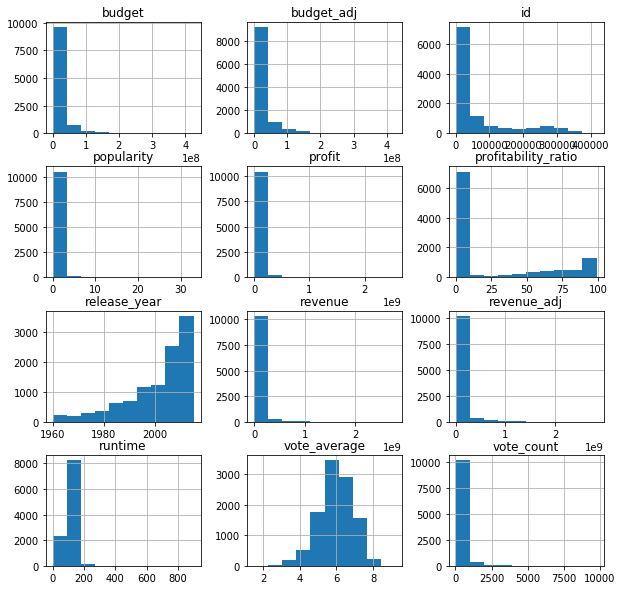

In [38]:
df.hist(figsize=(10,10));

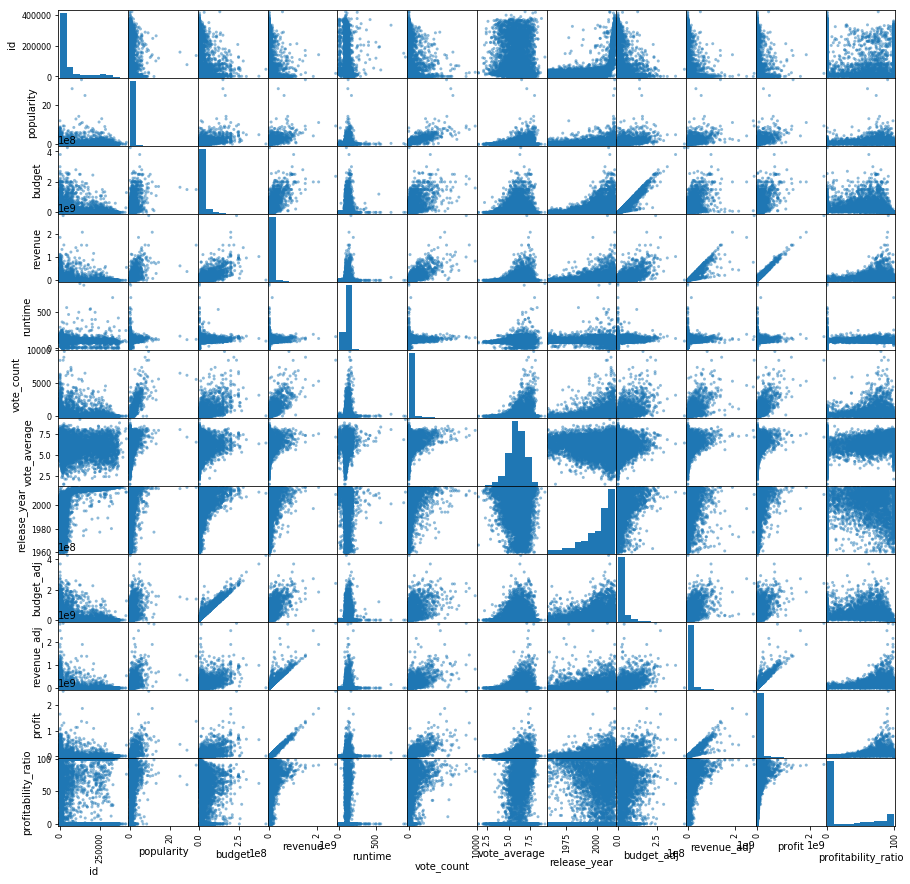

In [39]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

At first glance, revenue and profits are positively correlated.

### Q1. What genres are most popular overall?

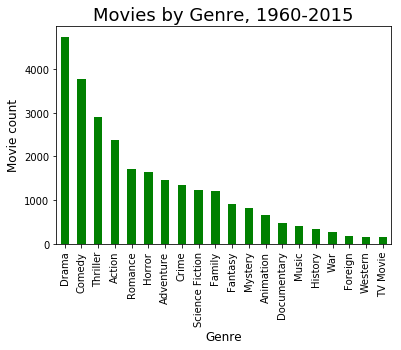

In [40]:
df_split_genre['genre_split'].value_counts().plot(kind='bar', color='g');
plt.title('Movies by Genre, 1960-2015', size=18)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

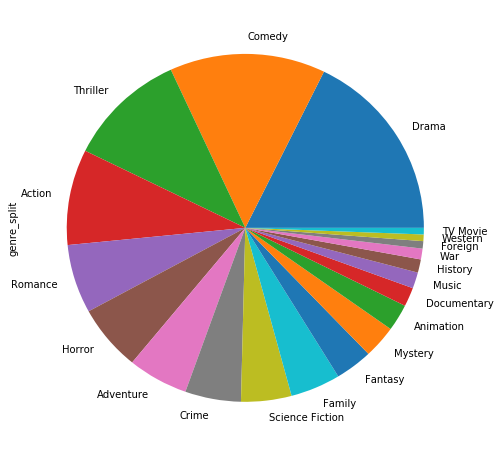

In [41]:
# also view with a pie chart
df_split_genre['genre_split'].value_counts().plot(kind='pie', figsize=(8,8))

Drama, Comedy, Thriller, and Action are the most popular genres in general. Further, we will analyze popularity decade wise

In [42]:
genres_decades = df_split_genre.groupby(['decades'])['genre_split'].value_counts()
genres_decades.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

decades        genre_split
sixties        Drama           186
               Comedy          124
               Action           89
seventies      Drama           251
               Thriller        168
               Action          137
eighties       Comedy          451
               Drama           449
               Action          283
nineties       Drama           902
               Comedy          785
               Thriller        512
two_thousands  Drama          1717
               Comedy         1421
               Thriller       1042
twenty_ten     Drama          1241
               Comedy          860
               Thriller        830
Name: genre_split, dtype: int64

Drama is the most popular genre for every decade except for the 80's which is Comedy. Thanks John Hughes!

### Q2. Has the average movie length lengthened or shortened over time?

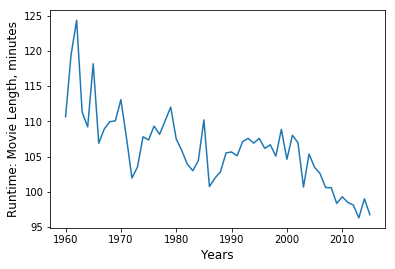

In [43]:
runtime = df.groupby('release_year')['runtime'].mean()
plt.plot(runtime)
plt.xlabel('Years', size=12)
plt.ylabel('Runtime: Movie Length, minutes', size=12);

Runtime has decreased throughout the years, from 118 minutes in 1960 to 97 minutes in 2015.
Let's look at this data for the decades:

decades
sixties          112.535176
seventies        107.734807
eighties         104.360108
nineties         106.566955
two_thousands    101.923729
twenty_ten        97.723314
Name: runtime, dtype: float64


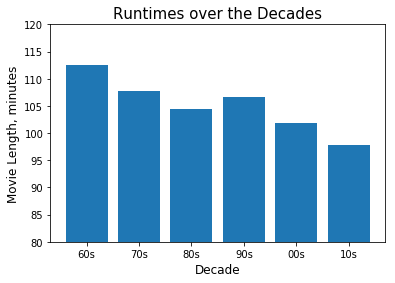

In [44]:
runtime_decade_locations = [1, 2, 3, 4, 5, 6]
runtime_decade_heights = df.groupby('decades')['runtime'].mean()
print(runtime_decade_heights)
labels = ['60s', '70s', '80s', '90s', '00s', '10s']
plt.bar(runtime_decade_locations, runtime_decade_heights, tick_label=labels)
plt.title('Runtimes over the Decades', size=15);
plt.xlabel('Decade', size=12)
plt.ylabel('Movie Length, minutes', size=12)
plt.ylim((80,120)); 
# view the y-coodinate more closely

116 - 98 = 16 minutes / 116 = .16 (a 16% decrease) from the 1960s through 2010's.

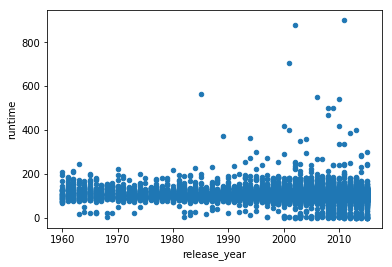

In [45]:
df.plot(x='release_year', y='runtime', kind='scatter');

### Q3. What properties are associated with higher revenues?

General scatter plots of revenue vs budget, profit, and popularity.

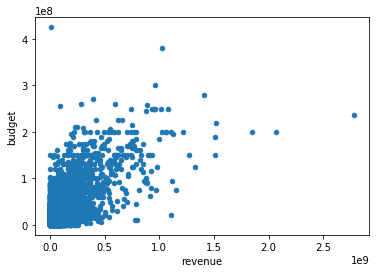

In [46]:
df.plot(x='revenue', y='budget', kind='scatter');

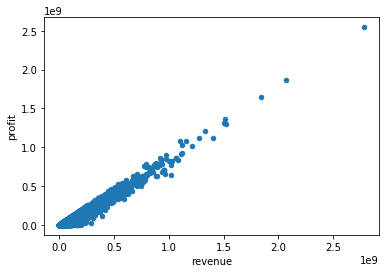

In [47]:
df.plot(x='revenue', y='profit', kind='scatter');

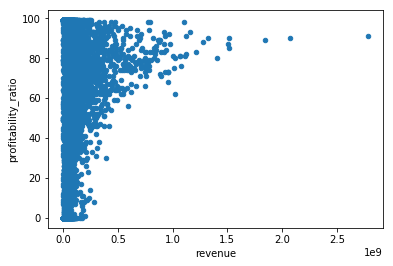

In [48]:
df.plot(x='revenue', y='profitability_ratio', kind='scatter');

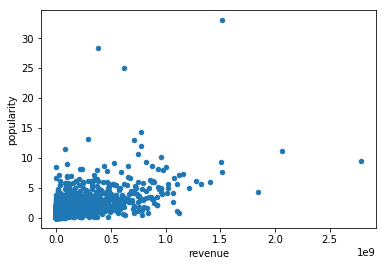

In [49]:
df.plot(x='revenue', y='popularity', kind='scatter');

- Revenue and budget have a weak positive correlation.
- Revenue and profit have a strong positive correlation.
- Revenue and profitability have a weak positive correlation.
- Revenue and popularity have positive correlation, movies with higher revenues tend to be more popular.

Have revenues increased over time?

decades
sixties          8.985570e+06
seventies        2.154416e+07
eighties         2.954496e+07
nineties         4.578074e+07
two_thousands    4.654393e+07
twenty_ten       4.064386e+07
Name: revenue, dtype: float64


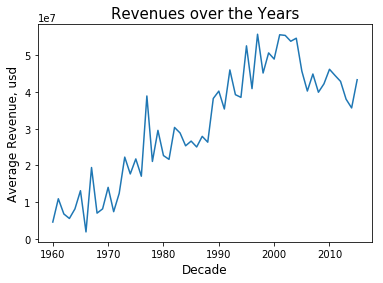

In [50]:
rev = df.groupby('release_year')['revenue'].mean()
print(df.groupby('decades')['revenue'].mean())
plt.plot(rev)
plt.title('Revenues over the Years', size=15);
plt.xlabel('Decade', size=12)
plt.ylabel('Average Revenue, usd', size=12);

Revenues over the years have increased 391%, from 11 million to 54 million.
But if you consider the time value of money, with an interest rate of ~5% and considering inflation one can notice that actually the revenues have gone down (54 Million would amount to about 3.9 Million dollars in 1960s)

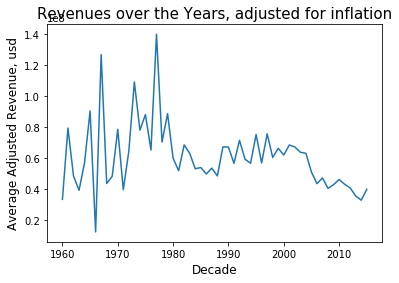

In [51]:
# first lets look at general revenue throughout the years, I'd expect the original revenue to trend towards increasing, 
# while the adjusted should stay relatively contant
revenue_adj = df.groupby('release_year')['revenue_adj'].mean()
plt.plot(revenue_adj)
plt.title('Revenues over the Years, adjusted for inflation', size=15);
plt.xlabel('Decade', size=12)
plt.ylabel('Average Adjusted Revenue, usd', size=12);

#### What variables are associated with higher revenues?
##### Are specific genres associated with higher revenues?

Finding the top 100 movies in box office revenues to create filters (new dataframes) for the topgrossing and below:

In [52]:
df_top_hundred = df.sort_values(by=['revenue'], ascending=False).head(100)
df_top_hundred['original_title'].nunique()

100

In [53]:
df_top_hundred.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profitability_ratio
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000
mean,43314.780000,5.191795,1.542350e+08,8.979584e+08,130.070000,3475.060000,6.909000,2007.970000,1.570108e+08,9.654023e+08,7.437234e+08,81.550000
std,55833.708222,4.467371,6.694002e+07,3.189943e+08,25.168625,1839.603382,0.651199,6.817172,6.237636e+07,4.034864e+08,3.069387e+08,7.990367
min,11.000000,0.436803,1.050000e+07,6.118994e+08,88.000000,201.000000,5.600000,1977.000000,2.372625e+07,5.726906e+08,3.990268e+08,62.000000
25%,673.750000,2.755044,1.122500e+08,7.097980e+08,110.250000,2245.750000,6.400000,2004.750000,1.149844e+08,7.086393e+08,5.694419e+08,75.750000
50%,12299.500000,4.264860,1.500000e+08,8.079637e+08,132.000000,3169.500000,6.950000,2010.000000,1.565855e+08,8.776267e+08,6.604137e+08,81.000000
75%,69080.750000,6.067551,2.000000e+08,9.590500e+08,144.250000,4266.000000,7.400000,2013.000000,1.924616e+08,1.062875e+09,7.998445e+08,88.250000
max,211672.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.100000,2015.000000,3.683713e+08,2.827124e+09,2.544506e+09,98.000000


The min revenue for the top 100 movies is 6.118994e+08
Create two filters with the split_genre dataframe: The top 100 grossing movies and below

In [54]:
below_hundred = df_split_genre.query('revenue < 6.118994e+08')
top_hundred = df_split_genre.query('revenue >= 6.118994e+08')
print(below_hundred['genre_split'].value_counts().nlargest(5))
print(top_hundred['genre_split'].value_counts().nlargest(5))

Drama       4732
Comedy      3760
Thriller    2884
Action      2323
Romance     1701
Name: genre_split, dtype: int64
Adventure          73
Action             53
Fantasy            41
Family             33
Science Fiction    33
Name: genre_split, dtype: int64


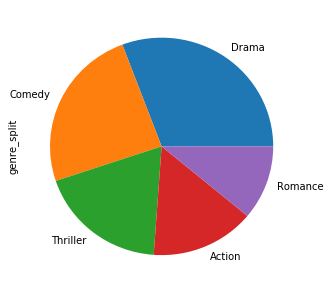

In [55]:
below_hundred['genre_split'].value_counts().nlargest(5).plot(kind='pie',figsize=(5,5));

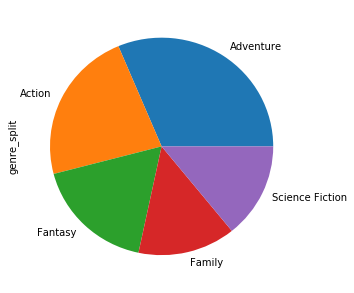

In [56]:
top_hundred['genre_split'].value_counts().nlargest(5).plot(kind='pie', figsize=(5,5));

Movies that make less revenue are Dramas, Comedies, and Thrillers.
The top 100 revenue producing movies are Adventure, Action, and Fantasy.

Do higher revenue films make more profits?

In [57]:
print(below_hundred['popularity'].mean())
print(top_hundred['popularity'].mean())
print(below_hundred['profit'].mean())
print(top_hundred['profit'].mean())
print(below_hundred['profitability_ratio'].mean())
print(top_hundred['profitability_ratio'].mean())

0.654595203503
5.29254594393
24674963.9686
754018391.673
24.9904282688
81.7040498442


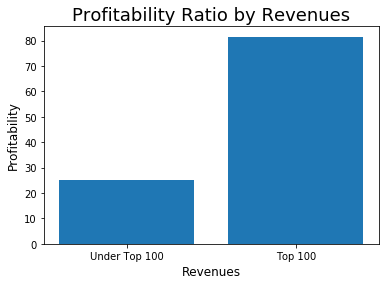

In [58]:
locations = [1, 2]
heights = [below_hundred['profitability_ratio'].mean(), df_top_hundred['profitability_ratio'].mean()]
labels = ['Under Top 100', 'Top 100']
plt.bar(locations, heights, tick_label=labels)
plt.title('Profitability Ratio by Revenues', size=18)
plt.xlabel('Revenues', size=12)
plt.ylabel('Profitability', size=12);

Movies that do better at the box office have nearly double the profits as those that make less. Movies under the Top 100 have profitability ratio of 25%, while those in the Top 100 is 84%, a 59% increase.

Top revenue movies have higher budgets and much higher profits.

In [59]:
# break it down by the bins:
top_profits = df.groupby('revenue_rating')['profit'].mean()
top_profits

revenue_rating
under_million    1.155967e+04
millions         6.497209e+07
billions         1.142942e+09
Name: profit, dtype: float64

(153355140.18691587, 907373531.85981309, 754018391.67289722) (15988437.547555992, 37359860.67459897, 24674963.968636502)


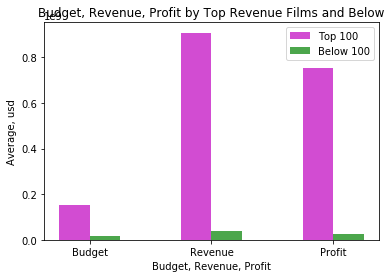

In [60]:
# plot bars
top = top_hundred['budget'].mean(), top_hundred['revenue'].mean(), top_hundred['profit'].mean()
bottom = below_hundred['budget'].mean(), below_hundred['revenue'].mean(), below_hundred['profit'].mean()
print(top, bottom)
ind = np.arange(len(top))
width = 0.25
top_bars = plt.bar(ind, top, width, color='m', alpha=.7, label='Top 100')
bottom_bars = plt.bar(ind + width, bottom, width, color='g', alpha=.7, label='Below 100')
# title and labels
plt.ylabel('Average, usd')
plt.xlabel('Budget, Revenue, Profit')
plt.title('Budget, Revenue, Profit by Top Revenue Films and Below')
locations = ind + width / 2 # xtick locations
labels = ['Budget', 'Revenue', 'Profit'] # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

Movies with higher revenues have correspondingly higher budgets, revenues, and profits.

### Q4. Which actors have starred in the most movies?

In [61]:
df_split_cast['cast_split'].value_counts().head(15)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Susan Sarandon        48
Liam Neeson           48
Alec Baldwin          47
Julianne Moore        47
Christopher Walken    46
Gene Hackman          46
Name: cast_split, dtype: int64

### Q5. Who has directed the most movies?

In [62]:
df_split_director['director_split'].value_counts().head(15)

Woody Allen             46
Clint Eastwood          34
Martin Scorsese         30
Steven Spielberg        30
Ridley Scott            23
Steven Soderbergh       23
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Tim Burton              19
John Carpenter          19
Robert Rodriguez        19
Barry Levinson          19
Francis Ford Coppola    19
Wes Craven              19
Name: director_split, dtype: int64

### Q6. What are the 10 most popular movies?

In [63]:
df[['popularity', 'original_title']].sort_values(by='popularity', ascending=False).head(10)

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent
631,12.971027,Captain America: The Winter Soldier
1329,12.037933,Star Wars
632,11.422751,John Wick
3,11.173104,Star Wars: The Force Awakens
633,10.739009,The Hunger Games: Mockingjay - Part 1


### Q7. What are the top 10 movies in revenue?

In [64]:
df[['revenue', 'original_title']].sort_values(by='revenue', ascending=False).head(10)

,revenue,original_title
1386,2781505847,Avatar
3,2068178225,Star Wars: The Force Awakens
5231,1845034188,Titanic
4361,1519557910,The Avengers
0,1513528810,Jurassic World
4,1506249360,Furious 7
14,1405035767,Avengers: Age of Ultron
3374,1327817822,Harry Potter and the Deathly Hallows: Part 2
5422,1274219009,Frozen
5425,1215439994,Iron Man 3


### Q8. What are the 10 most profitable movies?

In [65]:
df[['profitability_ratio', 'original_title']].sort_values(by='profitability_ratio', ascending=False).head(10)

,profitability_ratio,original_title
1559,99,Die PÃ¤pstin
7673,99,Gruz 200
7552,99,The Condemned
1479,99,The Uninvited
7604,99,The Babysitters
1477,99,Spread
7610,99,The Last Mimzy
7626,99,The Visitor
7629,99,King of California
7644,99,The Invincible Iron Man


<a id='conclusions'></a>
# Conclusion

- Drama, Comedy, Thriller, and Action are the most popular genres in general, and make up about 50% of all movies made from 1960-2015. TV Movies, Westerns, and Foreigns are the least popular.
- Since 1960, Drama has been the most popular genre per decade except for the 80's when Comedy was more poular.
- Runtime lengths have decreased by 16% from 1960 to 2015.
- Revenues from 1960-2015 have increased 391%, from 11 million to 54 million.
- However, taking into account the inflation adjustment it's held fairly steady.
- Although Drama, Comedy, and Thriller are the most popular genre overall, the Top 100 revenue producing movies are predominantly Adventure, Action, and Fantasy.
- Movies with higher revenues are consistently more profitable.
- Revenue and budget have a weakly positive correlation.
- Movies with higher revenues make more profits.
- Revenue and profitability have a weak positive correlation.
- Movies with higher revenues are more popular.

Notes & Limitations
> This data was collected through The Movie Databae (TMDB). The value of 'popularity' and 'votes' is subjective and dependent on those users voting and navigating through the website. Pooling imdb and rotten tomatoes and other sources might yield more accurate results.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0